In [3]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import imutils
import easyocr

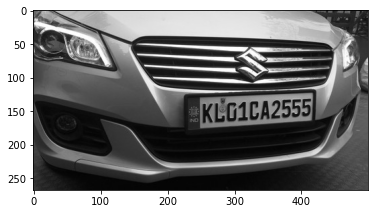

In [4]:
img= cv2.imread('D:\\cars\\images\\Cars0.png') #resmin okunması için cv2
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #cv2 ile resmin gri ağırlıklı dönüşümü yapılıyor
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)) #resmi göster

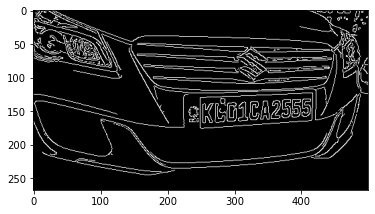

In [5]:
bfilter= cv2.bilateralFilter(gray,11,17,17) #gürültüden kurtulma, 11 = piksel komşuluğunun çapını temsil eder, 17=renk uzayında filtre sigması, 17=koordinat alanında filtre sigması
edged = cv2.Canny(bfilter, 30,200) #Edge detection   #Canny algoritması kanrları detect etmeye yarar #30=threshold1=yüksek eşik değeri,200=threshold2=düşük eşik değeri
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)) #oluşturulan resmi griye çevirerek göster

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for con in contours:
    approx = cv2.approxPolyDP(con, 10, True)
    if len(approx) == 4:
        location = approx
        break

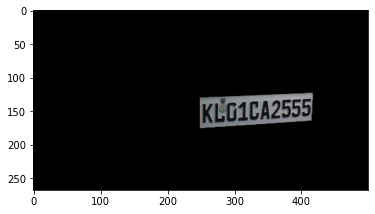

In [8]:
mask=np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask, [location], 0,255,-1)
new_image= cv2.bitwise_and(img,img,mask=mask)
plt.imshow(new_image, cmap='gray')

In [9]:
(x,y) = np.where(mask==255) #coordinates of mask section include plate
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[x1:x2 + 1, y1:y2 + 1]

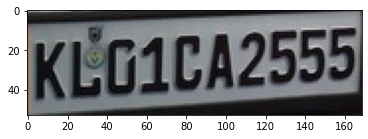

In [10]:
plt.imshow(cropped_image, cmap="gray")

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.5244985964854458)]

In [12]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
testimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #change the test image
res = cv2.putText(testimg, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(testimg, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

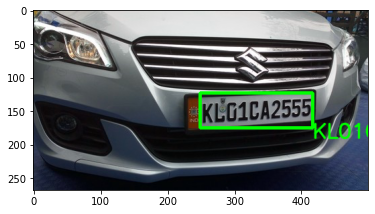

In [13]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [15]:
listOfPlates = pd.DataFrame()
temp = pd.DataFrame({'Plates': [text]})

In [16]:
print(temp)

       Plates
0  KL01CA2555


In [18]:
listOfPlates = listOfPlates.append(temp)

In [19]:
listOfPlates.head()

,Plates
0,KL01CA2555


In [20]:
print(listOfPlates)

       Plates
0  KL01CA2555


In [23]:
writer = pd.ExcelWriter('plates.xlsx')

listOfPlates.to_csv('plates.csv', sep=',', index=False, encoding='utf-8')
writer.save()

IndexError: At least one sheet must be visible